In [51]:
from src.ocsvm.OneClassSVMClassifier import OneClassSVMClassifier
from src.ocsvm.OneClassSVMClassifier import OneClassSVMModel 
import numpy as np
import matplotlib.pyplot as plt
import torch

In [52]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
feature_names = iris.feature_names
X = iris.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [54]:
X_scaled=X_scaled[:,:-2]

In [55]:
feature_names = feature_names[:-2]

In [56]:
feature_names

['sepal length (cm)', 'sepal width (cm)']

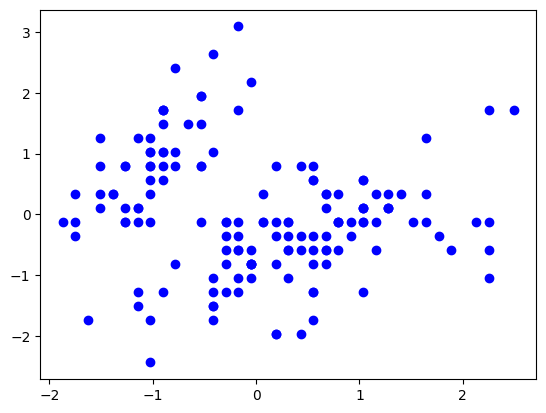

In [57]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], color='b');

In [58]:
ocsvm = OneClassSVMModel(nu=0.1, gamma=0.5)

In [59]:
decision, y_pred = ocsvm.fit(X_scaled)
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.])

In [60]:
x_data = torch.tensor(X_scaled)

In [61]:
classifier = OneClassSVMClassifier(x_data, nu=0.1, gamma=0.5, num_inducing_points=100)

In [62]:
classifier.fit()

(array([-5.88457086e-07,  1.87489956e-03,  3.11505054e-03,  5.95962952e-03,
         1.37158512e-02,  1.15091423e-02,  5.10208357e-08,  9.35785485e-04,
         2.70964403e-04,  2.50999492e-03,  1.82064892e-02,  1.23630644e-02,
         3.34825399e-03, -1.16337300e-07,  7.22071862e-03,  2.60437901e-04,
        -1.49609378e-02,  7.05186294e-03,  6.92155257e-03,  1.81765162e-03,
         5.58274046e-03,  8.07159181e-03,  2.44560387e-03,  1.19320569e-02,
         9.27700142e-03,  4.55156072e-08,  2.25827336e-03,  3.64203447e-03,
        -4.63632049e-08,  2.64638386e-03,  1.91629773e-03,  4.91619464e-03,
         7.93780463e-03,  2.80084412e-08,  5.28962813e-04,  2.67407022e-03,
         1.22233109e-02,  7.57480884e-04,  2.64055075e-03,  2.13751720e-02,
         9.39076534e-04,  5.01732381e-03,  0.00000000e+00,  5.40944914e-03,
        -1.84202042e-08,  9.85828482e-03,  4.19583114e-03,  3.93127233e-08,
         6.90431002e-03,  1.36818076e-02, -7.15606442e-03,  5.96971946e-03,
         4.3

In [63]:
decision, y_pred = classifier.decision()
y_pred

array([-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  0.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.])

In [64]:
percentages = {1: np.mean(y_pred == 1) * 100, -1: np.mean(y_pred == -1) * 100}
percentages

{1: 89.0, -1: 10.0}

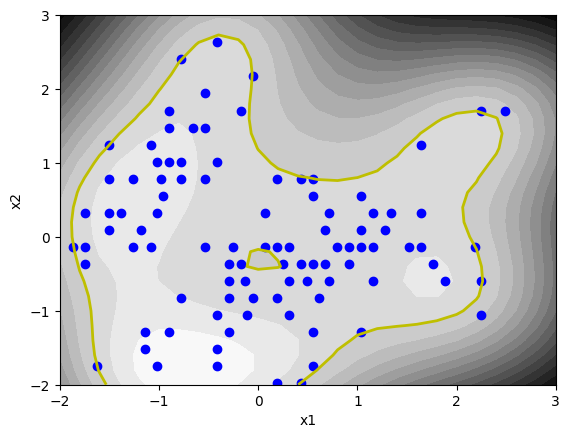

In [65]:
classifier.plot()

In [66]:
from src.explanation_algorithms.OCSVMSHAP import OCSVMSHAP
ocsvm_shap = OCSVMSHAP(X=x_data, classifier=classifier)

In [67]:
ocsvm_shap.fit_ocsvmshap(X=x_data, num_coalitions=2**x_data.shape[1])

/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/Users/swathisuhas/Documents/CISPA/OCSVM-SHAP/ExplainingGaussianProcess/src/utils/shapley_procedure/coalitions.py:19: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
100%|██████████| 3/3 [00:00<00:00, 2369.66it/s]


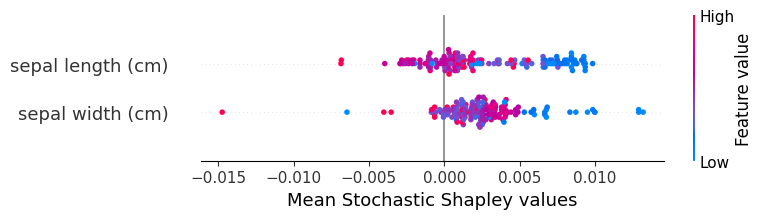

In [68]:
from src.utils.visualisation.deterministic_values import summary_plot
mean_stochastic_shapley_values = ocsvm_shap.return_deterministic_shapley_values()
summary_plot(mean_stochastic_shapley_values, x_data, feature_names=feature_names)
plt.xlabel("Mean Stochastic Shapley values")
plt.show()